In [54]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load data
data_path = "data_NO2.csv"
df = pd.read_csv(data_path, delimiter=';')

# Convert datetime column to datetime format
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])

# Sort by datetime if necessary
df = df.sort_values(by='datetime_utc')

# Select the last 5000 rows
df_test = df.iloc[:18912].copy()

# Shift the `spot_price` by 24 hours (24 periods if data is hourly) within the test data
df_test['spot_price_shifted'] = df_test['spot_price'].shift(24)

# Drop any rows with NaN values caused by shifting
df_test = df_test.dropna()

# Calculate MAE and MSE between the original and shifted `spot_price` for the last 5000 rows
mae = mean_absolute_error(df_test['spot_price'], df_test['spot_price_shifted'])
mse = mean_squared_error(df_test['spot_price'], df_test['spot_price_shifted'])
rmse = mean_squared_error(df_test['spot_price'], df_test['spot_price_shifted'], squared=False)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate mape
mape = 100 * (abs(df_test['spot_price'] - df_test['spot_price_shifted']) / df_test['spot_price']).mean()
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 1.8224756459127487
Mean Squared Error (MSE): 13.644487595298601
Root Mean Squared Error (RMSE): 3.6938445548369523
Mean Absolute Percentage Error (MAPE): 6.71%


/Users/johanbjerkem/Library/CloudStorage/OneDrive-NTNU/Documents/NTNU/5klassehost/ads/TDT4259/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


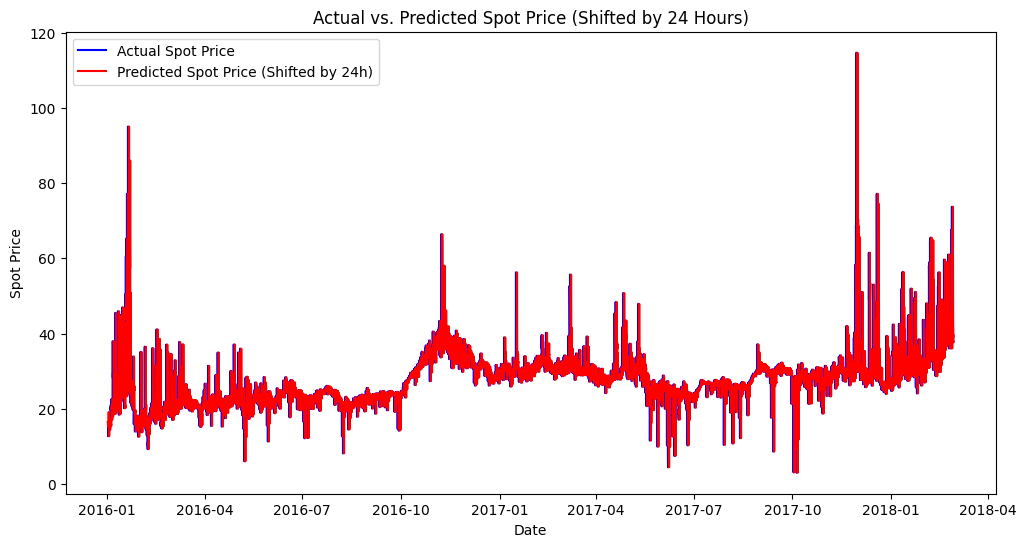

In [46]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted (shifted) spot prices for the last 5000 rows
plt.figure(figsize=(12, 6))

# Plot actual spot prices
plt.plot(df_test['datetime_utc'], df_test['spot_price'], label='Actual Spot Price', color='blue')

# Plot predicted spot prices (shifted values)
plt.plot(df_test['datetime_utc'], df_test['spot_price_shifted'], label='Predicted Spot Price (Shifted by 24h)', color='red')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Spot Price')
plt.title('Actual vs. Predicted Spot Price (Shifted by 24 Hours)')
plt.legend()
plt.show()


In [47]:
# Load data
data_path = "data_NO2.csv"
df = pd.read_csv(data_path, delimiter=';')

# Print the 24th last spot_price in the df
print(df.iloc[-25])
print(df.iloc[-1025])
print()

# Print the last spot_price in the df
print(df.iloc[-1])
print(df.iloc[-1001])

datetime_utc         2018-09-12 02:00:00+00:00
volume_demand                           3284.0
volume_production                       4957.0
spot_price                               47.73
Name: 23641, dtype: object
datetime_utc         2018-08-01 10:00:00+00:00
volume_demand                           3444.0
volume_production                       5789.0
spot_price                               54.91
Name: 22641, dtype: object

datetime_utc         2018-09-13 02:00:00+00:00
volume_demand                           3333.0
volume_production                       5025.0
spot_price                               51.81
Name: 23665, dtype: object
datetime_utc         2018-08-02 10:00:00+00:00
volume_demand                           3456.0
volume_production                       5362.0
spot_price                               54.22
Name: 22665, dtype: object
